In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sn

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


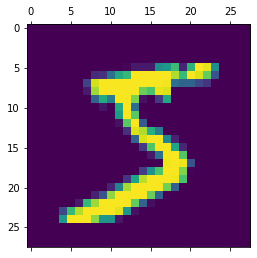

In [4]:
plt.matshow(X_train[0])

3


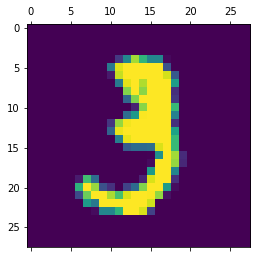

In [5]:
print(y_train[10])
plt.matshow(X_train[10])

In [6]:
X_train_flatten = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
print(X_train_flatten.shape, X_test_flatten.shape)

(60000, 784) (10000, 784)


In [7]:
model = keras.Sequential(
     [keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')]
     )

model.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train_flatten, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 32us/sample - loss: 3.4306 - accuracy: 0.3705
Epoch 2/5
60000/60000 [==============================] - 2s 29us/sample - loss: 1.6007 - accuracy: 0.6617
Epoch 3/5
60000/60000 [==============================] - 2s 30us/sample - loss: 1.2404 - accuracy: 0.7107
Epoch 4/5
60000/60000 [==============================] - 2s 29us/sample - loss: 1.1397 - accuracy: 0.7120
Epoch 5/5
60000/60000 [==============================] - 2s 29us/sample - loss: 1.1219 - accuracy: 0.7195


### Sacalling is important

In [8]:
X_train_flatten = X_train_flatten/X_test_flatten.max()
X_test_flatten = X_test_flatten/X_test_flatten.max()

In [9]:
model = keras.Sequential(
     [keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')]
     )

model.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train_flatten, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4877 - accuracy: 0.8763
Epoch 2/5
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3053 - accuracy: 0.9157
Epoch 3/5
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2854 - accuracy: 0.9207
Epoch 4/5
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2745 - accuracy: 0.9245
Epoch 5/5
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2679 - accuracy: 0.9261


In [10]:
model.evaluate(X_test_flatten, y_test)

10000/10000 [==============================] - 0s 24us/sample - loss: 0.2661 - accuracy: 0.9262


[0.2661454821676016, 0.9262]

7


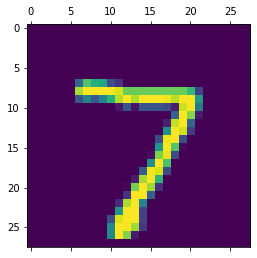

In [11]:
print(y_test[0])
plt.matshow(X_test[0])

In [12]:
y_predict = model.predict(X_test_flatten)
y_predict[0]

array([1.5582931e-05, 9.7134363e-11, 4.1717427e-05, 6.8251346e-03,
       1.1166532e-06, 5.7496163e-05, 9.7001851e-10, 7.8951263e-01,
       7.6244418e-05, 6.3200528e-04], dtype=float32)

In [13]:
y_predict[0].argmax()

7

6
6


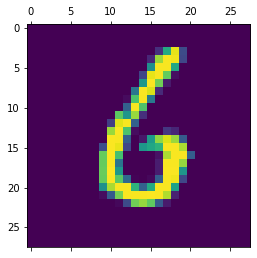

In [14]:
n = 50
print(y_test[n])
plt.matshow(X_test[n])
print(y_predict[n].argmax())

In [15]:
y_predict_label = [val_.argmax() for val_ in y_predict]
print(y_test[:5], y_predict_label[:5])

[7 2 1 0 4] [7, 2, 1, 0, 4]


Text(69.0, 0.5, 'True')

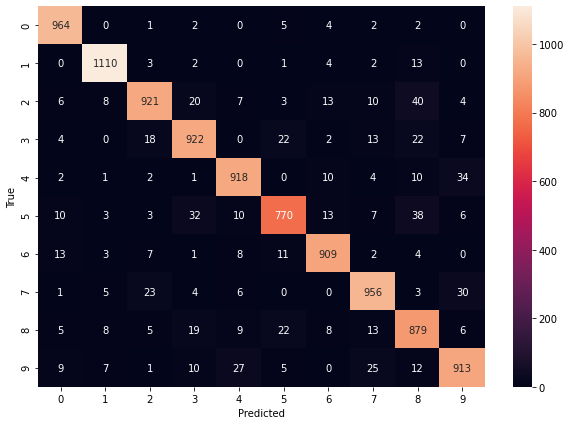

In [16]:
cm = tf.math.confusion_matrix(y_test, y_predict_label)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

In [17]:
model = keras.Sequential(
     [keras.layers.Dense(10, input_shape=(784,), activation='relu'),
     keras.layers.Dense(10, activation='sigmoid')]
     )

model.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train_flatten, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.5707 - accuracy: 0.8382
Epoch 2/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3054 - accuracy: 0.9148
Epoch 3/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2756 - accuracy: 0.9231
Epoch 4/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2586 - accuracy: 0.9283
Epoch 5/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2454 - accuracy: 0.9316


In [18]:
model.evaluate(X_test_flatten, y_test)

10000/10000 [==============================] - 0s 25us/sample - loss: 0.2427 - accuracy: 0.9328


[0.24265791352391242, 0.9328]

Text(69.0, 0.5, 'True')

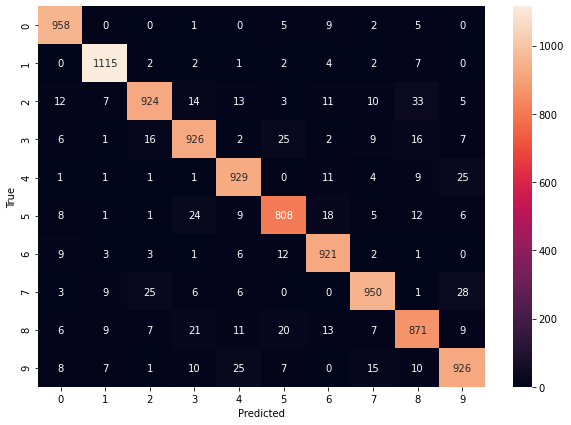

In [19]:
y_predict = model.predict(X_test_flatten)
y_predict_label = [val_.argmax() for val_ in y_predict]
cm = tf.math.confusion_matrix(y_test, y_predict_label)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

In [20]:
X_train = X_train/X_train.max()
X_test = X_test/X_test.max()

In [21]:
model = keras.Sequential(
    [keras.layers.Flatten(input_shape=(28,28)),
     keras.layers.Dense(10, activation='relu'),
     keras.layers.Dense(10, activation='sigmoid')]
     )

model.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.5222 - accuracy: 0.8532
Epoch 2/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3008 - accuracy: 0.9161
Epoch 3/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2736 - accuracy: 0.9235
Epoch 4/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2573 - accuracy: 0.9284
Epoch 5/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2461 - accuracy: 0.9309


In [22]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 26us/sample - loss: 0.2404 - accuracy: 0.9310


[0.2404144574403763, 0.931]

Text(69.0, 0.5, 'True')

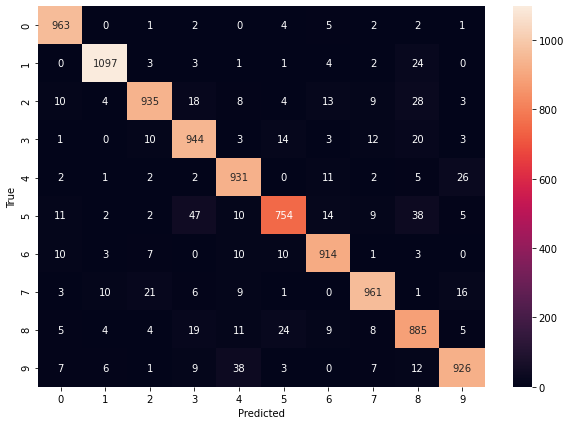

In [23]:
y_predict = model.predict(X_test)
y_predict_label = [val_.argmax() for val_ in y_predict]
cm = tf.math.confusion_matrix(y_test, y_predict_label)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

In [24]:
model = keras.Sequential(
    [keras.layers.Flatten(input_shape=(28,28)),
     keras.layers.Dense(300, activation='relu'),
     keras.layers.Dense(10, activation='relu'),
     keras.layers.Dense(10, activation='sigmoid')]
     )

model.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5)
model.evaluate(X_test, y_test)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3610 - accuracy: 0.8777
Epoch 2/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1205 - accuracy: 0.9650
Epoch 3/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0815 - accuracy: 0.9754
Epoch 4/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0595 - accuracy: 0.9821
Epoch 5/5
10000/10000 [==============================] - 0s 43us/sample - loss: 0.0772 - accuracy: 0.9788


[0.07715847418806515, 0.9788]

In [25]:
model = keras.Sequential(
    [keras.layers.Flatten(input_shape=(28,28)),
     keras.layers.Dense(300, activation='softplus'),
     keras.layers.Dense(10, activation='softplus'),
     keras.layers.Dense(10, activation='sigmoid')]
     )

model.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5)
model.evaluate(X_test, y_test)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3603 - accuracy: 0.8876
Epoch 2/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.1443 - accuracy: 0.9574
Epoch 3/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0952 - accuracy: 0.9719
Epoch 4/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0710 - accuracy: 0.9787
Epoch 5/5
10000/10000 [==============================] - 0s 41us/sample - loss: 0.0764 - accuracy: 0.9774


[0.07641166476276703, 0.9774]